In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df= pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
### FIRST STEP:: Checking for null values

In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df.shape

(8128, 13)

In [7]:
df.dropna().shape

(7906, 13)

In [8]:
((8128-7906)/8128)*100

##this is the % of data we are removing...As it is not much, we can go ahead and delete it.

2.731299212598425

In [9]:
df.dropna(inplace=True)

##any row containing a single or more null values will get deletd

In [10]:
df.shape

(7906, 13)

In [11]:
### SECOND STEP:: Checking for duplicated values

In [12]:
df.duplicated().sum()

1189

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.shape

(6717, 13)

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [17]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
### THIRD STEP:: Preprocessing some columns

In [19]:
df['mileage'].apply(lambda x:x.split()[0])

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8121     18.9
8122    22.54
8123     18.5
8124     16.8
8125     19.3
Name: mileage, Length: 6717, dtype: object

In [20]:
df['mileage']= df['mileage'].apply(lambda x:x.split()[0])

In [21]:
df['mileage'].astype('float32')

## to make analysis easier

0       23.400000
1       21.139999
2       17.700001
3       23.000000
4       16.100000
          ...    
8121    18.900000
8122    22.540001
8123    18.500000
8124    16.799999
8125    19.299999
Name: mileage, Length: 6717, dtype: float32

In [22]:
df['mileage']= df['mileage'].astype('float32')

In [23]:
df['engine']= df['engine'].apply(lambda x:x.split()[0])
df['engine']= df['engine'].astype('int32')

In [24]:
df['max_power']= df['max_power'].apply(lambda x:x.split()[0])
df['max_power']= df['max_power'].astype('float32')

In [25]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
374,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.000000,1969,190.000000,400Nm,5.0
7458,Datsun RediGO 1.0 S,2017,240000,35000,Petrol,Individual,Manual,First Owner,22.500000,999,67.000000,91Nm@ 4250rpm,5.0
7241,Volkswagen Polo Diesel Comfortline 1.2L,2011,320000,77000,Diesel,Individual,Manual,Second Owner,22.070000,1199,73.900002,180Nm@ 2000rpm,5.0
2741,Tata Zest Quadrajet 1.3 XMS,2014,280000,60000,Diesel,Individual,Manual,Second Owner,23.000000,1248,88.699997,200Nm@ 1750-3000rpm,5.0
3909,Maruti Swift Dzire Vdi BSIV,2011,347000,80600,Diesel,Individual,Manual,First Owner,19.299999,1248,73.900002,190Nm@ 2000rpm,5.0


In [26]:
df['seats']= df['seats'].astype('int32')

In [27]:
df.drop(columns=['torque'],inplace=True)

In [28]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497,78.000000,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5


In [29]:
### THIRD STEP:: Exploratory Data Analysis

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


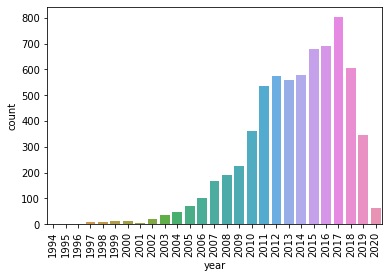

In [31]:
sns.countplot(df['year'])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
df.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427335,-0.387918,0.366048,-0.019763,0.159889,0.025021
selling_price,0.427335,1.000000,-0.161265,-0.108655,0.442772,0.692323,0.158531
km_driven,-0.387918,-0.161265,1.000000,-0.196419,0.253460,0.041770,0.207890
mileage,0.366048,-0.108655,-0.196419,1.000000,-0.579153,-0.378609,-0.459188
engine,-0.019763,0.442772,0.253460,-0.579153,1.000000,0.683506,0.658711
max_power,0.159889,0.692323,0.041770,-0.378609,0.683506,1.000000,0.259028
seats,0.025021,0.158531,0.207890,-0.459188,0.658711,0.259028,1.000000


In [33]:
## FOURTH STEP:: Feature Engineering

In [34]:
df['old']= 2020- df['year']

In [35]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,old
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5,6
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5,6
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497,78.000000,5,14
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5,10
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5,13


In [36]:
df.drop(columns=['year'],inplace=True)

In [37]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,old
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497,78.000000,5,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5,13


In [38]:
## BACK TO EDA

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

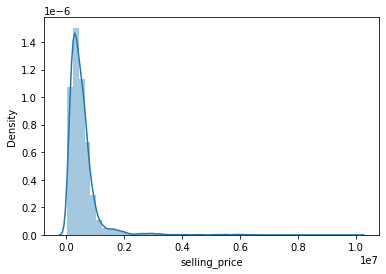

In [39]:
sns.distplot(df['selling_price'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

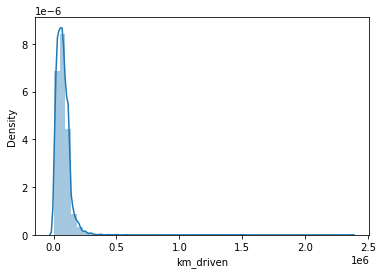

In [40]:
sns.distplot(df['km_driven'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='km_driven'>

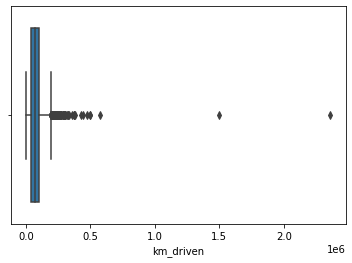

In [41]:
sns.boxplot(df['km_driven'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fuel', ylabel='count'>

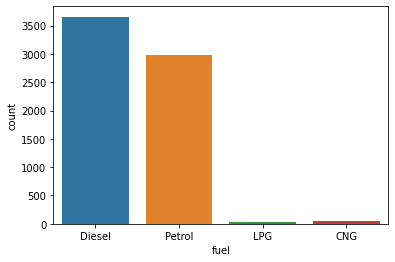

In [42]:
sns.countplot(df['fuel'])

## we will either remove or merge LPG&CNG

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='seller_type', ylabel='count'>

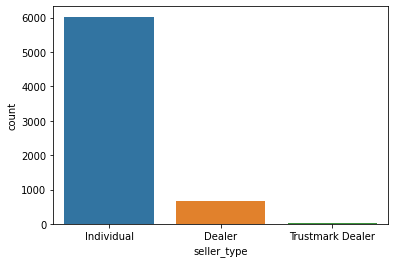

In [43]:
 sns.countplot(df['seller_type'])
    
## we will merge Trustmark Dealer into Dealer

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transmission', ylabel='count'>

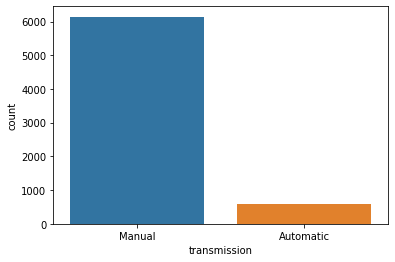

In [44]:
 sns.countplot(df['transmission'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


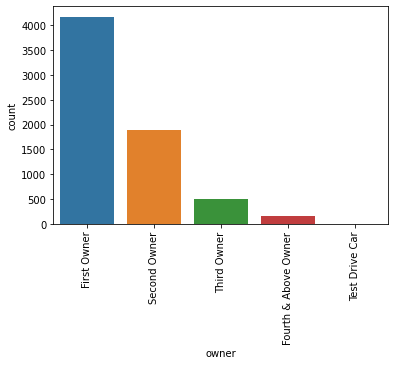

In [45]:
sns.countplot(df['owner'])
plt.xticks(rotation='vertical')
plt.show()

## we will remove Test Drive Car

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

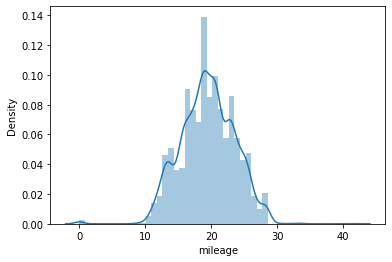

In [46]:
sns.distplot(df['mileage'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mileage'>

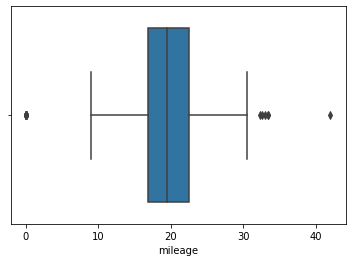

In [47]:
sns.boxplot(df['mileage'])

#some outliers

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engine', ylabel='Density'>

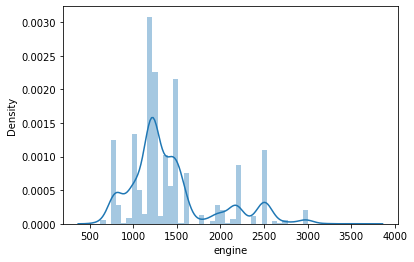

In [48]:
sns.distplot(df['engine'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='engine'>

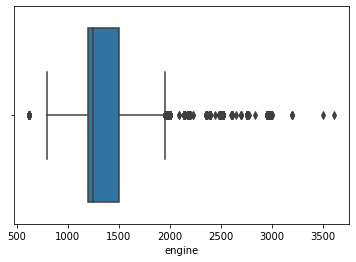

In [49]:
sns.boxplot(df['engine'])

##unsure about outliers

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_power', ylabel='Density'>

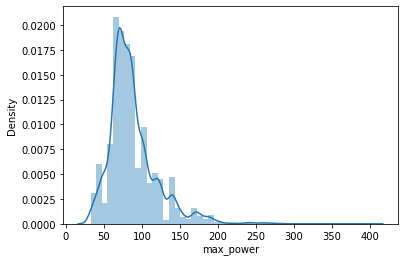

In [50]:
sns.distplot(df['max_power'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='max_power'>

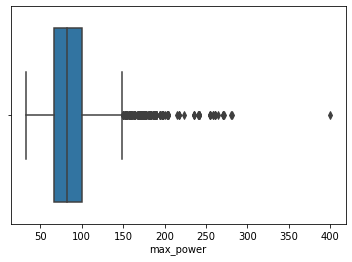

In [51]:
sns.boxplot(df['max_power'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5     5254
7      966
8      221
4      124
9       74
6       57
10      18
2        2
14       1
Name: seats, dtype: int64

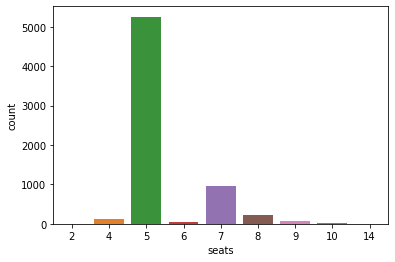

In [52]:
sns.countplot(df['seats'])
df['seats'].value_counts()

##can keep top4 categories

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='old', ylabel='Density'>

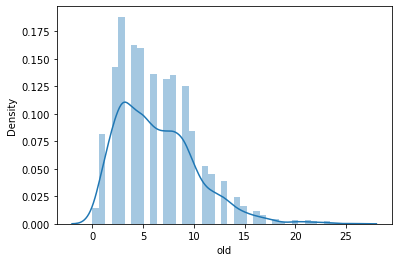

In [53]:
sns.distplot(df['old'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='old'>

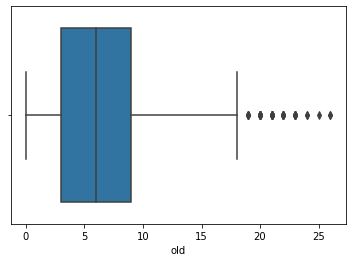

In [54]:
sns.boxplot(df['old'])

#some outliers

In [55]:
## BI-VARIATE ANALYSIS

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

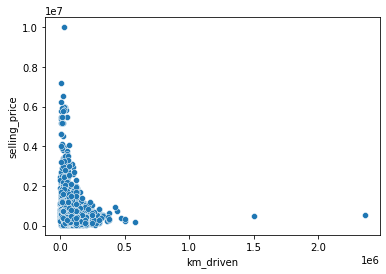

In [56]:
sns.scatterplot(df['km_driven'],df['selling_price'])


##weird. almost no correlation

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

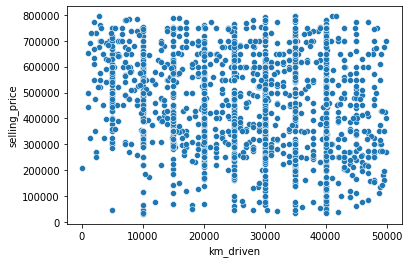

In [57]:
sns.scatterplot(df[df['km_driven']<50000]['km_driven'],df[df['selling_price'] <800000]['selling_price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

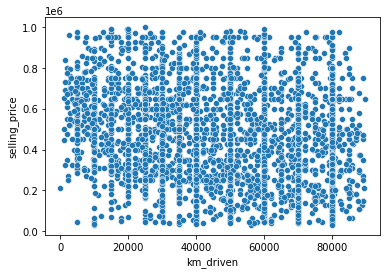

In [58]:
sns.scatterplot(df[df['km_driven']<90000]['km_driven'],df[df['selling_price'] <1000000]['selling_price'])

In [59]:
df.corr()['selling_price']


##very important to find out relation between sp & other columns

selling_price    1.000000
km_driven       -0.161265
mileage         -0.108655
engine           0.442772
max_power        0.692323
seats            0.158531
old             -0.427335
Name: selling_price, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

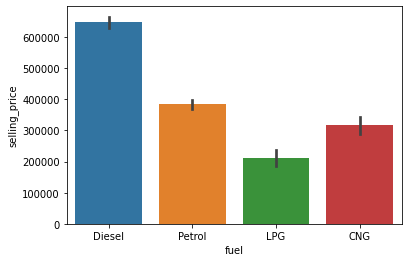

In [60]:
sns.barplot(df['fuel'],df['selling_price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

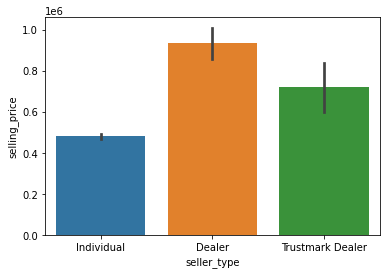

In [61]:
sns.barplot(df['seller_type'],df['selling_price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

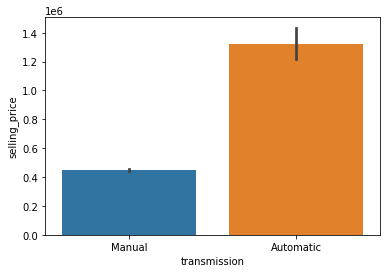

In [62]:
sns.barplot(df['transmission'],df['selling_price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='owner', ylabel='selling_price'>

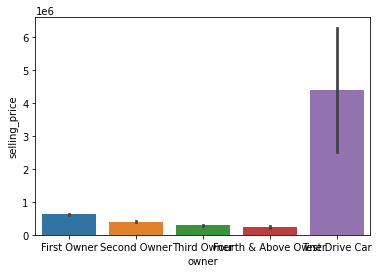

In [63]:
sns.barplot(df['owner'],df['selling_price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='owner', ylabel='selling_price'>

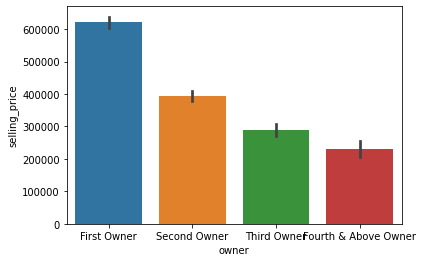

In [64]:
sns.barplot(df[df['owner'] != 'Test Drive Car']['owner'],df['selling_price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

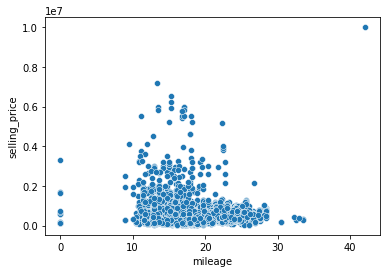

In [65]:
sns.scatterplot(df['mileage'],df['selling_price'])


## sp is not much dependent on mileage ie weak correlation

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='engine', ylabel='selling_price'>

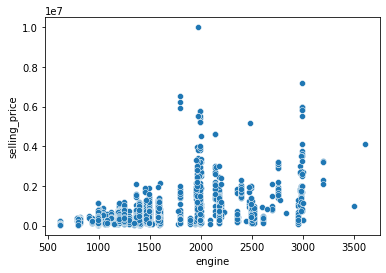

In [66]:
sns.scatterplot(df['engine'],df['selling_price'])


## okay okay correlation

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

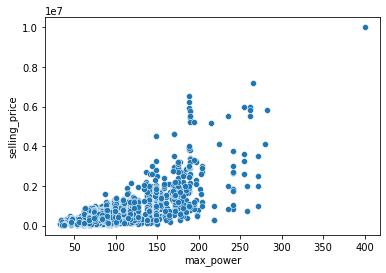

In [67]:
sns.scatterplot(df['max_power'],df['selling_price'])


## stronger correlation

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='seats', ylabel='selling_price'>

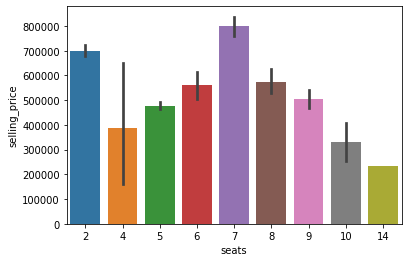

In [68]:
sns.barplot(df['seats'],df['selling_price'])


## barplot cos seats is categorical data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='old', ylabel='selling_price'>

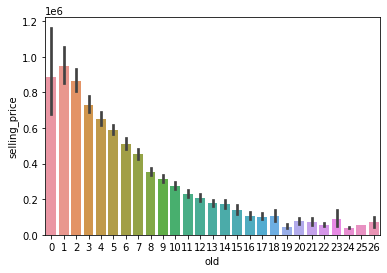

In [69]:
sns.barplot(df['old'],df['selling_price'])


## barplot cos old is categorical data...stronger correlation

In [70]:
df.head()

## km_driven and mileage do not really affect selling_price

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,old
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497,78.000000,5,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5,13


<AxesSubplot:>

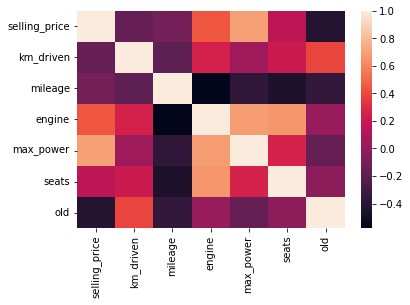

In [71]:
df.corr()
sns.heatmap(df.corr())

## helps to check correlation between columns/properties
## ex: engine and max_power have a strong correlation

In [72]:
df['name'].apply(lambda x:x.split()[0])

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8121     Maruti
8122    Hyundai
8123    Hyundai
8124    Hyundai
8125     Maruti
Name: name, Length: 6717, dtype: object

In [73]:
df['brand']= df['name'].apply(lambda x:x.split()[0])

In [74]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,old,brand
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5,6,Maruti
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5,6,Skoda
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497,78.000000,5,14,Honda
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5,10,Hyundai
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5,13,Maruti


In [75]:
df['brand'].value_counts()

Maruti           2089
Hyundai          1214
Mahindra          709
Tata              633
Honda             361
Ford              353
Toyota            324
Chevrolet         216
Renault           206
Volkswagen        173
Nissan             73
Skoda              69
Datsun             57
Mercedes-Benz      46
BMW                45
Fiat               39
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Isuzu               4
Ambassador          4
Force               4
Land                3
Kia                 3
Daewoo              3
MG                  3
Ashok               1
Lexus               1
Opel                1
Name: brand, dtype: int64

In [76]:
df.drop(columns=['name'],inplace=True)

In [77]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,old,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5,6,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5,6,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497,78.000000,5,14,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5,10,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5,13,Maruti
